In [2]:
# Install LightGBM if not already installed


# Import necessary libraries
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)


In [3]:
# Load your dataset
df = pd.read_csv("dataset/liver_cirrhosis.csv")  # Replace with your actual file path

# Display the first few rows
df.head()


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [5]:
df.describe

<bound method NDFrame.describe of        N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0        2221      C          Placebo  18499   F       N            Y       N   
1        1230      C          Placebo  19724   M       Y            N       Y   
2        4184      C          Placebo  11839   F       N            N       N   
3        2090      D          Placebo  16467   F       N            N       N   
4        2105      D          Placebo  21699   F       N            Y       N   
...       ...    ...              ...    ...  ..     ...          ...     ...   
24995    3584      D  D-penicillamine  23612   F       N            N       N   
24996    3584      D  D-penicillamine  23612   F       N            N       N   
24997     971      D  D-penicillamine  16736   F       N            Y       Y   
24998    3707      C  D-penicillamine  16990   F       N            Y       N   
24999    3707      C  D-penicillamine  16990   F       N            Y      

In [6]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [7]:
# Separate features and target variable
X = df.drop(columns=['Stage'])  # Replace 'Stage' with your actual target column name
y = df['Stage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [9]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Apply label encoding
encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])


In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode object (categorical) columns
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))


In [12]:
if y_train.dtype == 'object':
    le_y = LabelEncoder()
    y_train = le_y.fit_transform(y_train)
    y_test = le_y.transform(y_test)


In [22]:
from lightgbm import early_stopping

# Initialize the LGBM Classifier
lgbm_model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(np.unique(y)),
    boosting_type='gbdt',
    learning_rate=0.05,
    n_estimators=1000,
    random_state=42
)

# Train the model with early stopping using callbacks
lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],  # Include both training and validation sets
    eval_metric='multi_logloss',
    callbacks=[early_stopping(stopping_rounds=50)]
)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1982
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 18
[LightGBM] [Info] Start training from score -1.106846
[LightGBM] [Info] Start training from score -1.085745
[LightGBM] [Info] Start training from score -1.103374
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[678]	training's multi_logloss: 0.0275591	valid_1's multi_logloss: 0.109965


LGBMClassifier(learning_rate=0.05, n_estimators=1000, num_class=3,
               objective='multiclass', random_state=42)

Test Accuracy: 96.40%

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.95      0.96      1653
           2       0.95      0.97      0.96      1688
           3       0.98      0.98      0.98      1659

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



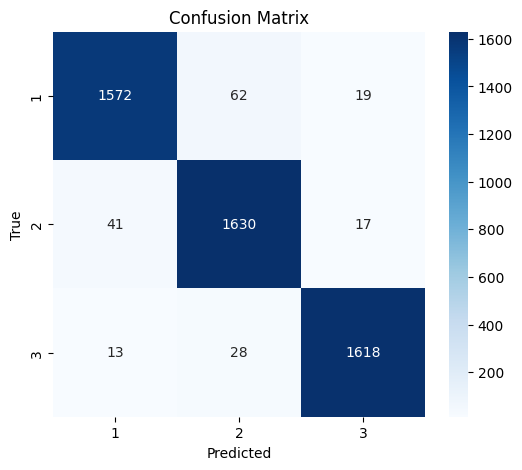

In [23]:
# Make predictions
y_pred = lgbm_model.predict(X_test)
y_prob = lgbm_model.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2%}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


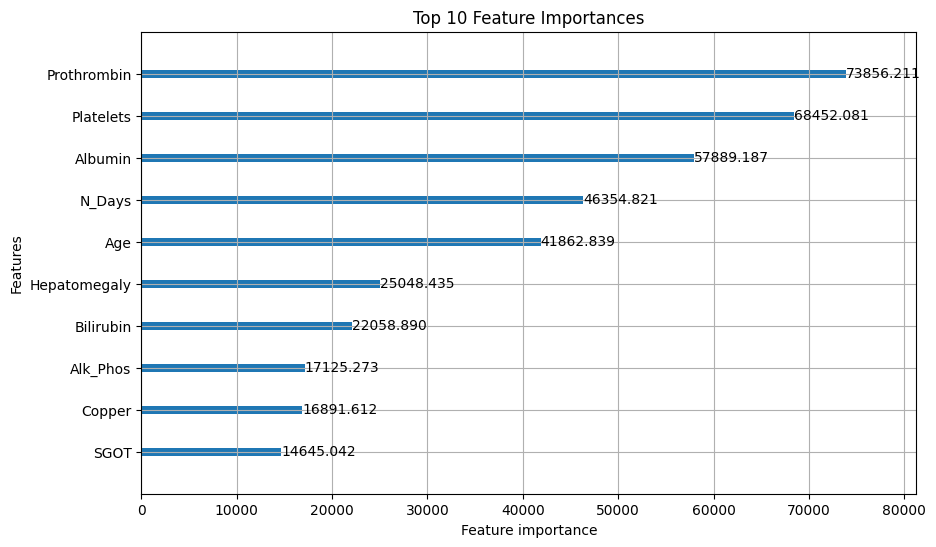

In [24]:
# Plot feature importance
lgb.plot_importance(lgbm_model, max_num_features=10,
                    importance_type='gain', figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.show()


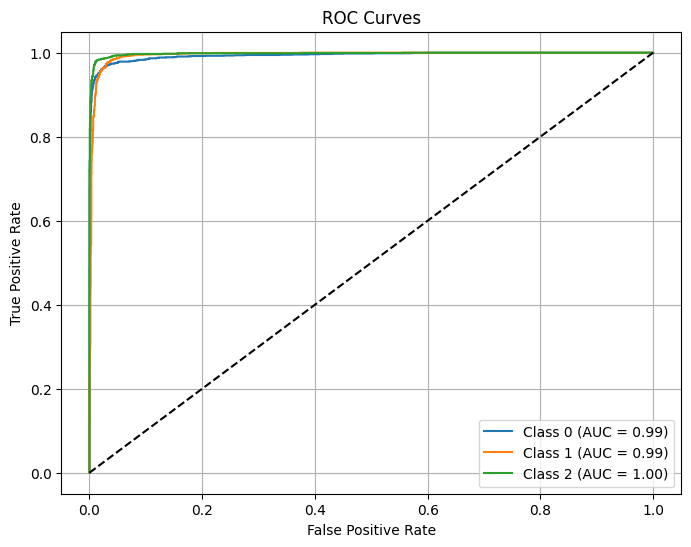

In [25]:
# Compute ROC-AUC score and plot ROC curve for each class
try:
    # Binarize the output
    from sklearn.preprocessing import label_binarize
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))
    y_prob = lgbm_model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(np.unique(y))):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(np.unique(y))):
        plt.plot(fpr[i], tpr[i],
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()
except Exception as e:
    print("ROC-AUC could not be computed:", e)


In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

In [27]:
# 1) Make predictions
y_pred = lgbm_model.predict(X_test)
y_prob = lgbm_model.predict_proba(X_test)

In [28]:
 #2) Compute metrics
acc   = accuracy_score(y_test, y_pred)
prec  = precision_score(y_test, y_pred, average='weighted')
rec   = recall_score(y_test, y_pred, average='weighted')
f1    = f1_score(y_test, y_pred, average='weighted')

print(f"🔹 Test Accuracy : {acc:.4f}")
print(f"🔹 Test Precision: {prec:.4f}")
print(f"🔹 Test Recall   : {rec:.4f}")
print(f"🔹 Test F1 Score : {f1:.4f}\n")

print("🔸 Classification Report:\n", classification_report(y_test, y_pred))

🔹 Test Accuracy : 0.9640
🔹 Test Precision: 0.9641
🔹 Test Recall   : 0.9640
🔹 Test F1 Score : 0.9640

🔸 Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.95      0.96      1653
           2       0.95      0.97      0.96      1688
           3       0.98      0.98      0.98      1659

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



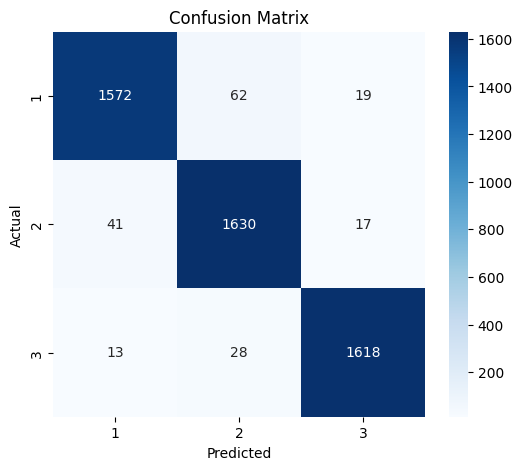

In [29]:
#3) Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lgbm_model.classes_,
            yticklabels=lgbm_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

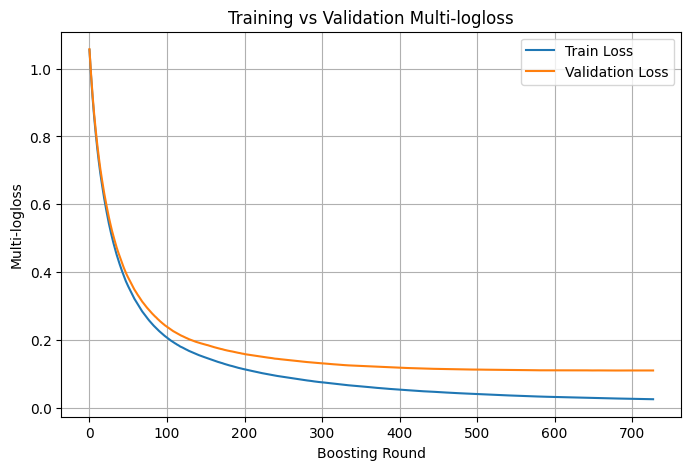

In [30]:
evals = lgbm_model.evals_result_
epochs = len(evals['training']['multi_logloss'])

plt.figure(figsize=(8,5))
plt.plot(range(epochs), evals['training']['multi_logloss'], label='Train Loss')
plt.plot(range(epochs), evals['valid_1']['multi_logloss'], label='Validation Loss')
plt.title("Training vs Validation Multi-logloss")
plt.xlabel("Boosting Round")
plt.ylabel("Multi-logloss")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# 5) Simple Error Analysis: show first 5 misclassified samples
mis_idx = np.where(y_pred != y_test)[0][:5]
print("\n🚨 Some misclassified examples:")
for idx in mis_idx:
    print(f"Index {idx}: True={y_test.iloc[idx] if hasattr(y_test, 'iloc') else y_test[idx]}  "
          f"Pred={y_pred[idx]}  Probabilities={np.round(y_prob[idx],3)}")



🚨 Some misclassified examples:
Index 19: True=1  Pred=2  Probabilities=[0.16  0.478 0.362]
Index 55: True=3  Pred=2  Probabilities=[0.002 0.997 0.001]
Index 168: True=1  Pred=2  Probabilities=[0.154 0.845 0.001]
Index 216: True=1  Pred=2  Probabilities=[0.307 0.68  0.013]
Index 227: True=3  Pred=2  Probabilities=[0.018 0.92  0.062]


In [ ]:
# 6) Save the trained model
with open("models/lgbm_model.pkl", "wb") as f:
    pickle.dump(lgbm_model, f)
print("\n✅ LightGBM model saved to models/lgbm_model.pkl")


✅ LightGBM model saved to models/lgbm_model.pkl
